In [1]:
import numpy as np
import SAL_calculation as sc
import SAL_visualization as sv

### Define arbitrary fields

In [2]:
# bars and fields together

# size of field
sz = 31
y = np.arange(sz)
x = np.arange(sz)
ygrid, xgrid = np.meshgrid(y, x, indexing="ij")

# settings
sigs_a = [2.5]#, 2, 3]#, 5]
ymus_a = [20]#, 10, 12]#, 50]
xmus_a = [20]#, 24, 3]#, 50]
ampls_a = [500]#, 300, 600]#, 600]

sigs_b = [2.5]
ymus_b = [15]
xmus_b = [15]
ampls_b = [500]

# bring values on field
field_a = np.zeros(ygrid.shape)
for i in range(len(ampls_a)):
    field_a += ampls_a[i] * sv.gauss2D(
        ygrid, xgrid, ymus_a[i], xmus_a[i], sigs_a[i]
    )

field_b = np.zeros(ygrid.shape)
for i in range(len(ampls_b)):
    field_b += ampls_b[i] * sv.gauss2D(
        ygrid, xgrid, ymus_b[i], xmus_b[i], sigs_b[i]
    )

### Calculate SAL metrics 

In [3]:
sal_out = sc.SAL_timestep(
    field_a,
    field_b,
)

sal_out

<xarray.Dataset>
Dimensions:    (nfields_sim: 1, nfields_ref: 1)
Dimensions without coordinates: nfields_sim, nfields_ref
Data variables: (12/13)
    time       <U3 'xxx'
    S          float64 0.0
    A          float64 -2.361e-05
    L          float64 0.1667
    L1         float64 0.1667
    thld_sim   float64 0.236
    ...         ...
    nF_sim     (nfields_sim) int64 1
    nF_ref     (nfields_ref) int64 1
    tcm_y_sim  (nfields_sim) float64 20.0
    tcm_x_sim  (nfields_sim) float64 20.0
    tcm_y_ref  (nfields_ref) float64 15.0
    tcm_x_ref  (nfields_ref) float64 15.0

### Visualization

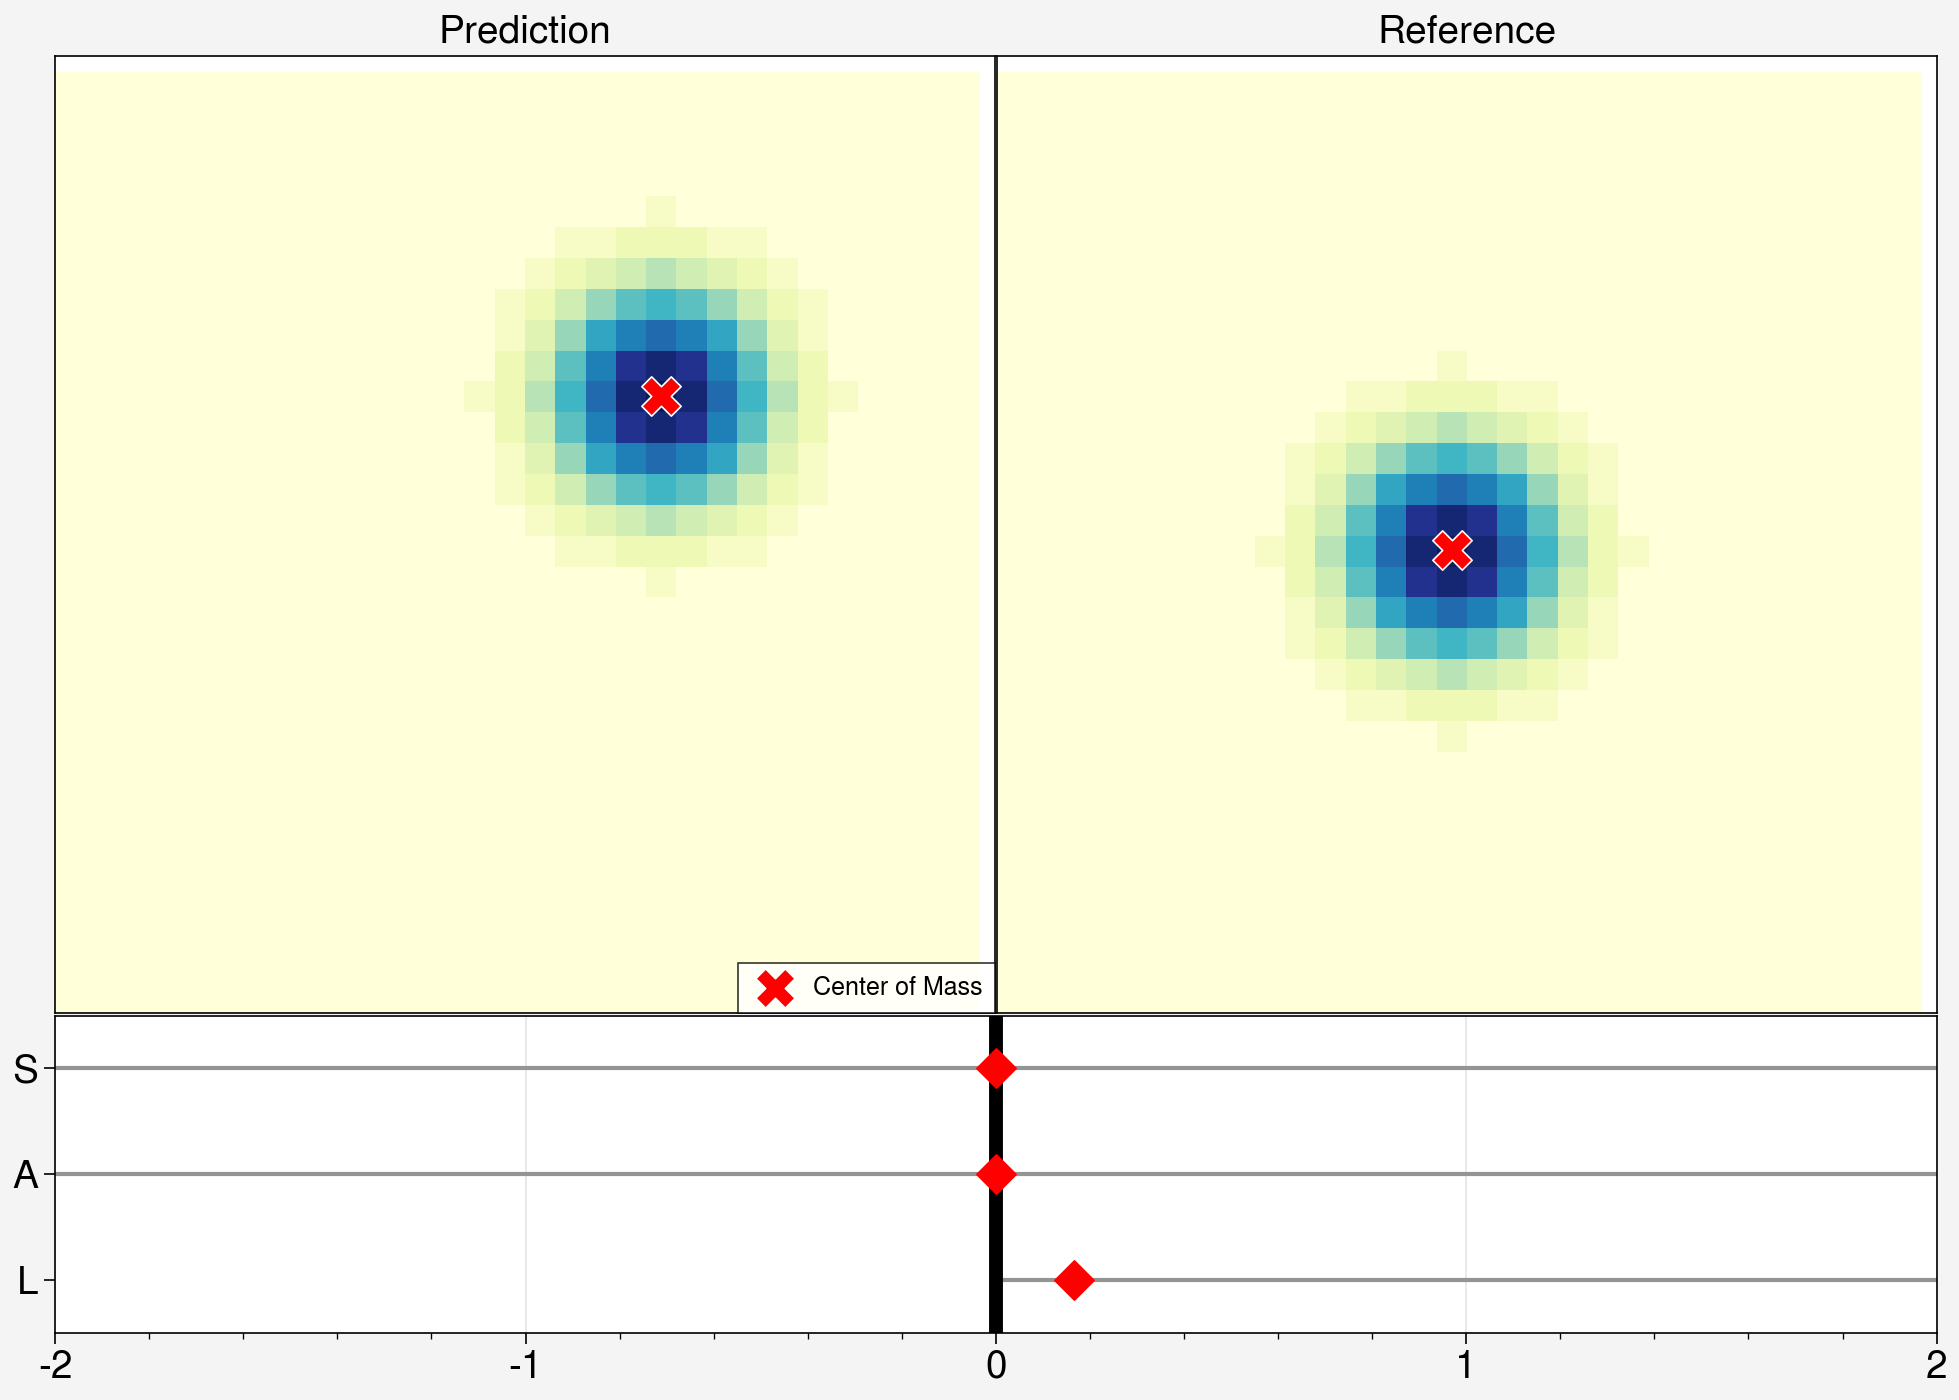

In [4]:
fields = np.concatenate(
    (np.array(field_a)[np.newaxis, :], np.array(field_b)[np.newaxis, :])
)

sv.maps_with_bars(fields, sal_out, cMap="YlGnBu")